In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = ("C:\\Users\\user\\Desktop\\asd\\kidney_disease.csv")
names = ["age","bp","sg","al","su","rbc","pc","pcc","ba",
         "bgr","bu","sc","sod","pot","hemo","pcv","wc",
         "rc","htn","dm","cad","appet","pe","ane","class"]
data = pd.read_csv(path, names=names)

In [2]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       70
wc       105
rc       130
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [4]:
data1 = data
for i in data1:
    print('values in "{}":\n'.format(i),data1[i].unique())

values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
values in "rbc":
 [nan 'normal' 'abnormal']
values in "pc":
 ['normal' 'abnormal' nan]
values in "pcc":
 ['notpresent' 'present' nan]
values in "ba":
 ['notpresent' 'present' nan]
values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [6]:
data1[["htn","dm","cad","pe","ane"]] = data1[["htn","dm","cad","pe","ane"]].replace(to_replace={"yes":1,"no":0})
data1[["rbc","pc"]] = data1[["rbc","pc"]].replace(to_replace={"abnormal":1,"normal":0})
data1[["pcc","ba"]] = data1[["pcc","ba"]].replace(to_replace={"present":1,"notpresent":0})
data1[["appet"]] = data1[["appet"]].replace(to_replace={"good":1,"poor":0,"no":np.nan})
data1["class"] = data1["class"].replace(to_replace={"ckd":1,"ckd\t":1,"notckd":0,"no":0})
data1["cad"] = data1["cad"].replace(to_replace="\tno",value=0)
data1["dm"] = data1["dm"].replace(to_replace={"\tno":0,"\tyes":1," yes":1, "":np.nan})

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     330 non-null    object 
 16  wc      295 non-null    object 
 17  rc      270 non-null    object 
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [8]:
data1 = data1.replace("?", np.nan)

In [9]:
data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [10]:
data1["rc"] = pd.to_numeric(data1.rc, errors='coerce')
data1["wc"] = pd.to_numeric(data1.wc, errors='coerce')
data1["pcv"] = pd.to_numeric(data1.pcv, errors='coerce')

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wc      294 non-null    float64
 17  rc      269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [12]:
data1 = data1.fillna(data1.mean())
pd.options.display.float_format = '{:.1f}'.format

In [13]:
data1["age"] = data1["age"].astype("int64")
data1["bp"] = data1["bp"].astype("int64")
data1["al"] = data1["al"].astype("int64")
data1["su"] = data1["su"].astype("int64")
data1["bgr"] = data1["bgr"].astype("int64")
data1["bu"] = data1["bu"].astype("int64")
data1["sod"] = data1["sod"].astype("int64")
data1["pcv"] = data1["pcv"].astype("int64")
data1["wc"] = data1["wc"].astype("int64")
data1["rbc"] = data1["rbc"].astype("int64")
data1["pc"] = data1["pc"].astype("int64")
data1["pcc"] = data1["pcc"].astype("int64")
data1["ba"] = data1["ba"].astype("int64")
data1["dm"] = data1["dm"].astype("int64")
data1["htn"] = data1["htn"].astype("int64")
data1["cad"] = data1["cad"].astype("int64")
data1["appet"] = data1["appet"].astype("int64")
data1["pe"] = data1["pe"].astype("int64")
data1["ane"] = data1["ane"].astype("int64")

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    int64  
 2   sg      400 non-null    float64
 3   al      400 non-null    int64  
 4   su      400 non-null    int64  
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    int64  
 10  bu      400 non-null    int64  
 11  sc      400 non-null    float64
 12  sod     400 non-null    int64  
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    int64  
 16  wc      400 non-null    int64  
 17  rc      400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

In [15]:
data1.shape

(400, 25)

In [16]:
data1.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.0,1,0,0,0,0,0,121,...,44,7800,5.2,1,1,0,1,0,0,1
1,7,50,1.0,4,0,0,0,0,0,148,...,38,6000,4.7,0,0,0,1,0,0,1
2,62,80,1.0,2,3,0,0,0,0,423,...,31,7500,4.7,0,1,0,0,0,1,1
3,48,70,1.0,4,0,0,1,1,0,117,...,32,6700,3.9,1,0,0,0,1,1,1
4,51,80,1.0,2,0,0,0,0,0,106,...,35,7300,4.6,0,0,0,1,0,0,1


In [17]:
data1.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,51.5,76.5,1.0,1.0,0.4,0.1,0.2,0.1,0.1,148.0,...,38.7,8406.1,4.7,0.4,0.3,0.1,0.8,0.2,0.1,0.6
std,17.0,13.5,0.0,1.3,1.0,0.3,0.4,0.3,0.2,74.8,...,8.2,2523.2,0.8,0.5,0.5,0.3,0.4,0.4,0.4,0.5
min,2.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,9.0,2200.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,42.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,...,34.0,6975.0,4.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,54.0,78.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,126.0,...,38.0,8406.0,4.7,0.0,0.0,0.0,1.0,0.0,0.0,1.0
75%,64.0,80.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,150.0,...,44.0,9400.0,5.1,1.0,1.0,0.0,1.0,0.0,0.0,1.0
max,90.0,180.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,490.0,...,54.0,26400.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
class_counts = data1.groupby("class").size() 
print(class_counts)

class
0    150
1    250
dtype: int64


<AxesSubplot:>

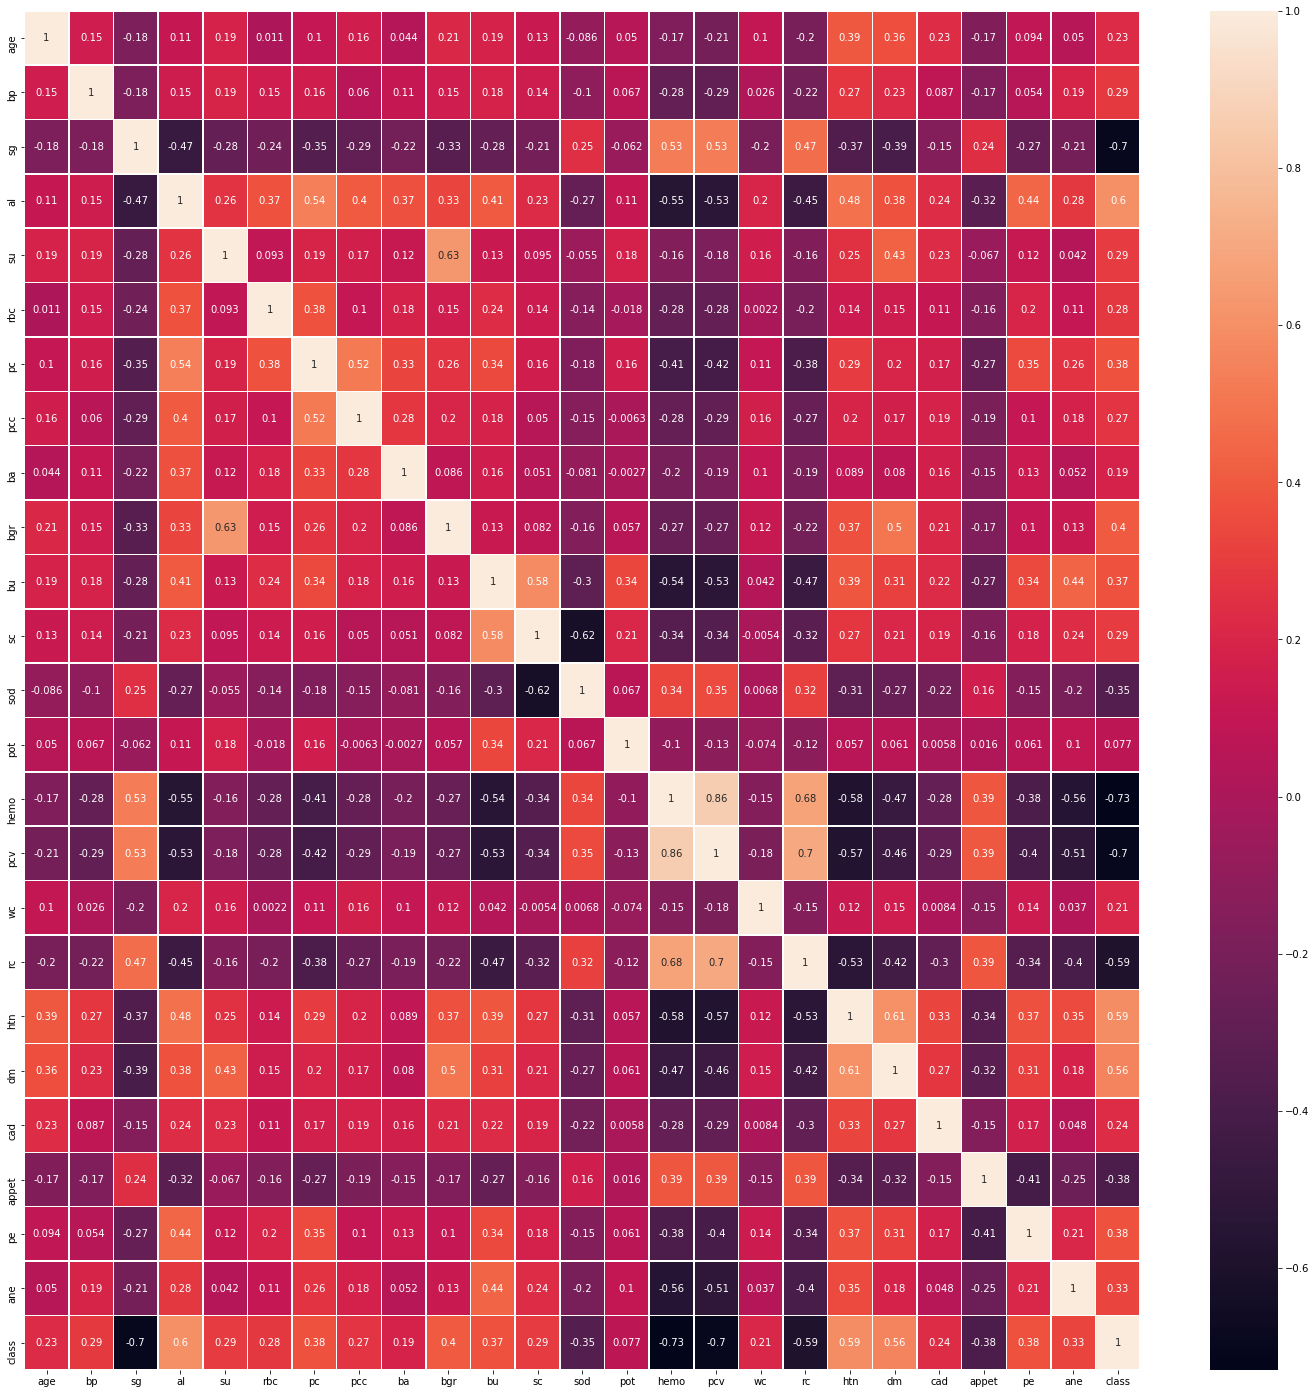

In [19]:
dc = data1.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dc, annot=True, linewidths=.5, ax=ax, fmt=".2g")

<AxesSubplot:xlabel='bgr', ylabel='su'>

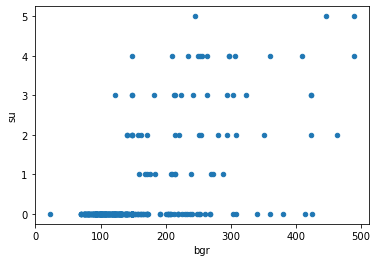

In [20]:
data1.plot(x="bgr", y="su", kind="scatter")

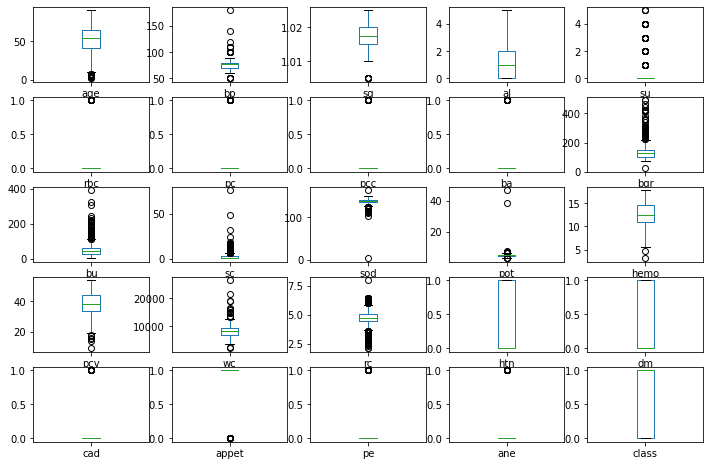

In [21]:
data1.plot(kind="box", subplots=True, figsize=(12,8),layout=(5,5), sharex=False, sharey=False) 
plt.show()

In [22]:
for x in ["bgr"]:
    q3,q1 = np.percentile(data1.loc[:,x],[75,25])
    iqr = q3-q1
 
    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)
 
    data1.loc[data1[x] < min,x] = np.nan
    data1.loc[data1[x] > max,x] = np.nan

In [23]:
for x in ["bu"]:
    q3,q1 = np.percentile(data1.loc[:,x],[75,25])
    iqr = q3-q1
 
    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)
 
    data1.loc[data1[x] < min,x] = np.nan
    data1.loc[data1[x] > max,x] = np.nan

In [24]:
for x in ["rc"]:
    q3,q1 = np.percentile(data1.loc[:,x],[75,25])
    iqr = q3-q1
 
    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)
 
    data1.loc[data1[x] < min,x] = np.nan
    data1.loc[data1[x] > max,x] = np.nan

In [25]:
for x in ["wc"]:
    q3,q1 = np.percentile(data1.loc[:,x],[75,25])
    iqr = q3-q1
 
    max = q3+(1.5*iqr)
    min = q1-(1.5*iqr)
 
    data1.loc[data1[x] < min,x] = np.nan
    data1.loc[data1[x] > max,x] = np.nan

In [26]:
data1.isnull().sum()

age       0
bp        0
sg        0
al        0
su        0
rbc       0
pc        0
pcc       0
ba        0
bgr      53
bu       41
sc        0
sod       0
pot       0
hemo      0
pcv       0
wc       17
rc       75
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64

In [27]:
data1 = data1.fillna(data1.mean())

In [28]:
data1.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,...,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
mean,51.5,76.5,1.0,1.0,0.4,0.1,0.2,0.1,0.1,124.3,...,38.7,8116.0,4.8,0.4,0.3,0.1,0.8,0.2,0.1,0.6
std,17.0,13.5,0.0,1.3,1.0,0.3,0.4,0.3,0.2,31.2,...,8.2,1766.5,0.4,0.5,0.5,0.3,0.4,0.4,0.4,0.5
min,2.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,...,9.0,3800.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,42.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,101.8,...,34.0,7000.0,4.7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,54.0,78.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,124.3,...,38.0,8406.0,4.7,0.0,0.0,0.0,1.0,0.0,0.0,1.0
75%,64.0,80.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,141.0,...,44.0,9100.0,4.8,1.0,1.0,0.0,1.0,0.0,0.0,1.0
max,90.0,180.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,220.0,...,54.0,12800.0,5.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0


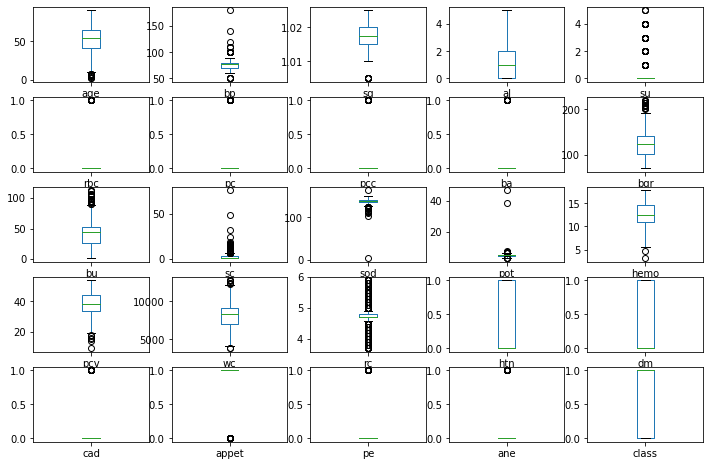

In [29]:
data1.plot(kind="box", subplots=True, figsize=(12,8),layout=(5,5), sharex=False, sharey=False) 
plt.show()

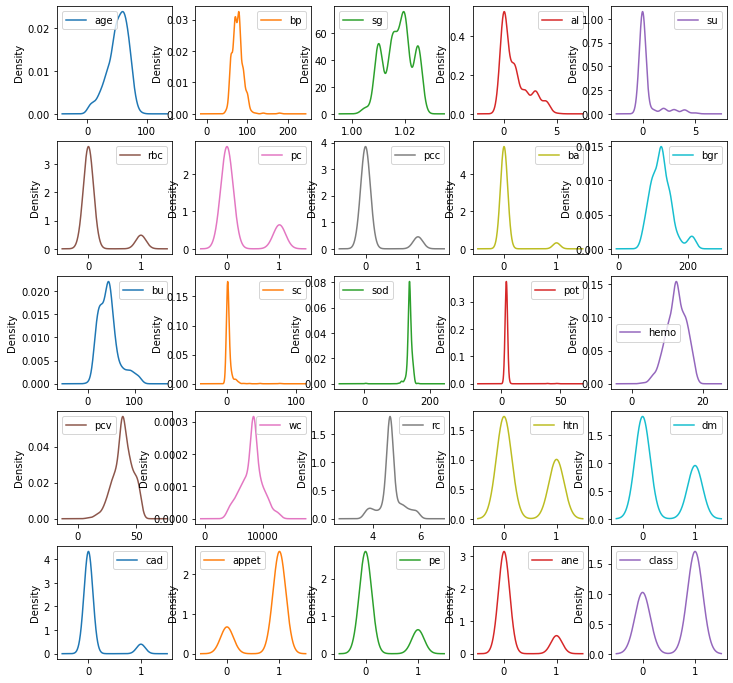

In [30]:
data1.plot(kind='density', subplots=True, figsize=(12,12),layout=(5,5), sharex=False) 
plt.show()

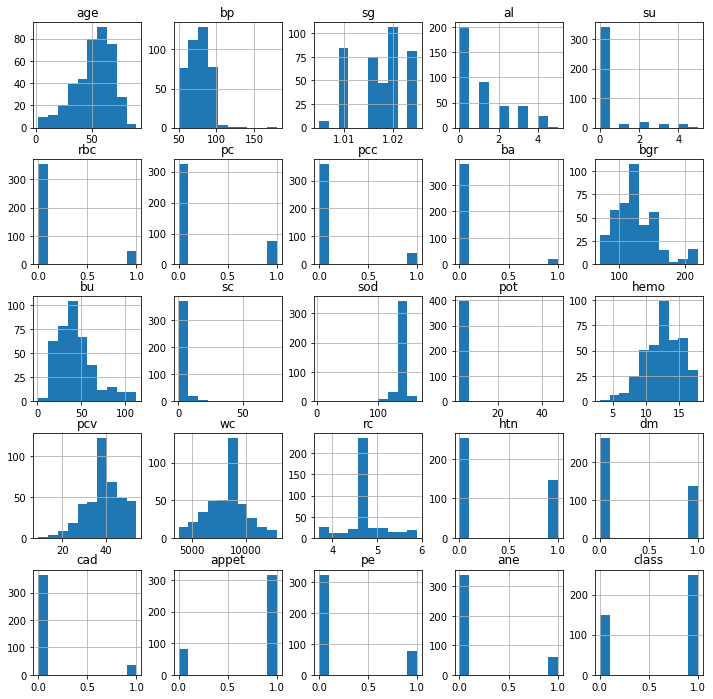

In [31]:
import matplotlib.pyplot as plt
data1.hist(figsize=(12,12))
plt.show()

# ANN

In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

new_data = data1.values
X = new_data[:,0:24]
y = new_data[:,-1]

set_printoptions(precision=2)
sc=MinMaxScaler()
sc.fit(X)
x_train_std = sc.transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_train_std,y,test_size=0.3,random_state=0)
mlp = MLPClassifier(activation="relu",hidden_layer_sizes=[2,3],solver="lbfgs",max_iter=200000,tol=0.000000001)
mlp.fit(x_train,y_train)
pred_train = mlp.predict(x_train)
pred_test = mlp.predict(x_test)

In [33]:
print("train accuracy: ",accuracy_score(pred_train,y_train))
print("test accuracy: ",accuracy_score(pred_test,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train, y_train))
print("test F-1: ",f1_score(pred_test, y_test))
print("\n")
print("train recall:",recall_score(pred_train, y_train))
print("test recall:",recall_score(pred_test, y_test))
print("\n")
print("train precision:",precision_score(pred_train,y_train))
print("test precision:",precision_score(pred_test,y_test))

train accuracy:  1.0
test accuracy:  0.975


train F-1:  1.0
test F-1:  0.979020979020979


train recall: 1.0
test recall: 0.9859154929577465


train precision: 1.0
test precision: 0.9722222222222222


# ANN WITH F_CLASSIFIER FEATURE SELECTION

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

test = SelectKBest(f_classif, k=5)
fit = test.fit(x_train, y_train)

set_printoptions(precision=3)
print(fit.scores_,'\n',names[0:24])

new_train_fclass = fit.transform(x_train)
new_test_fclass = fit.transform(x_test)

print('\n')
print(new_train_fclass[0:5,:])
print("\n")
print(new_test_fclass[0:5,:])      

[ 18.656  23.002 237.934 147.953  25.576  19.711  44.102  19.711   7.979
  45.772  36.77   30.917  83.887   1.766 283.392 257.857   5.971 100.575
 152.62  135.917  14.282  50.21   46.485  26.575] 
 ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


[[0.25  0.6   0.497 0.533 1.   ]
 [0.25  0.    0.673 0.644 1.   ]
 [0.25  0.    0.81  0.778 1.   ]
 [0.5   0.2   0.641 0.644 0.   ]
 [0.75  0.    0.728 0.889 0.   ]]


[[0.62  0.2   0.374 0.333 1.   ]
 [0.75  0.    0.959 0.689 0.   ]
 [1.    0.    0.701 0.711 0.   ]
 [0.25  0.6   0.34  0.333 1.   ]
 [0.5   0.6   0.374 0.378 1.   ]]


In [35]:
mlp = MLPClassifier(activation="relu",hidden_layer_sizes=[3],solver="lbfgs",max_iter=200000,tol=0.000000001)
mlp.fit(new_train_fclass, y_train)
pred_train_fclass = mlp.predict(new_train_fclass)
pred_test_fclass = mlp.predict(new_test_fclass)
print("train accuracy: ",accuracy_score(pred_train_fclass,y_train))
print("test accuracy: ",accuracy_score(pred_test_fclass,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_fclass, y_train))
print("test F-1: ",f1_score(pred_test_fclass, y_test))
print("\n")
print("train recall:",recall_score(pred_train_fclass, y_train))
print("test recall:",recall_score(pred_test_fclass, y_test))
print("\n")
print("train precision:",precision_score(pred_train_fclass,y_train))
print("test precision:",precision_score(pred_test_fclass,y_test))

train accuracy:  0.975
test accuracy:  0.9583333333333334


train F-1:  0.9803921568627452
test F-1:  0.9659863945578231


train recall: 0.9776536312849162
test recall: 0.9466666666666667


train precision: 0.9831460674157303
test precision: 0.9861111111111112


# ANN WITH CHI-SQUARE FEATURE SELECTION

In [36]:
test = SelectKBest(chi2, k=4)
fit = test.fit(x_train, y_train)

set_printoptions(precision=3)
print(fit.scores_,'\n',names[0:24])

new_train_chi2 = fit.transform(x_train)
new_test_chi2 = fit.transform(x_test)
print('\n')
print(new_train_chi2[0:5,:])
print("\n")
print(new_test_chi2[0:5,:])

[ 1.252  1.22  14.299 31.005 12.263 16.618 30.944 16.618  7.449  4.996
  3.1    2.946  0.1    0.196  6.835  6.056  0.423  6.094 61.315 58.449
 12.607  9.026 32.09  21.202] 
 ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


[[0.6 1.  1.  0. ]
 [0.  1.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.2 0.  0.  1. ]
 [0.  0.  0.  0. ]]


[[0.2 1.  0.  1. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.6 1.  1.  1. ]
 [0.6 1.  0.  0. ]]


In [37]:
mlp = MLPClassifier(activation="relu",hidden_layer_sizes=[3],solver="lbfgs",max_iter=200000,tol=0.000000001)
mlp.fit(new_train_chi2, y_train)
pred_train_chi2 = mlp.predict(new_train_chi2)
pred_test_chi2 = mlp.predict(new_test_chi2)
print("train accuracy: ",accuracy_score(pred_train_chi2,y_train))
print("test accuracy: ",accuracy_score(pred_test_chi2,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_chi2, y_train))
print("test F-1: ",f1_score(pred_test_chi2, y_test))
print("\n")
print("train recall:",recall_score(pred_train_chi2, y_train))
print("test recall:",recall_score(pred_test_chi2, y_test))
print("\n")
print("train precision:",precision_score(pred_train_chi2,y_train))
print("test precision:",precision_score(pred_test_chi2,y_test))

train accuracy:  0.9392857142857143
test accuracy:  0.9083333333333333


train F-1:  0.9501466275659824
test F-1:  0.9219858156028369


train recall: 0.9938650306748467
test recall: 0.9420289855072463


train precision: 0.9101123595505618
test precision: 0.9027777777777778


# ANN-PARAMETER OPTIMIZATION


In [38]:
from sklearn.model_selection import GridSearchCV

gizli_katman = [(1),(3),(3,4),(2,2)]
kriter=['tanh','logistic']

parameters=dict(activation=kriter, hidden_layer_sizes=gizli_katman)

grid_search = GridSearchCV(mlp,
                           param_grid = parameters, verbose=1,
                           scoring = 'roc_auc', 
                           cv = 10, 
                           n_jobs = -1) 
grid_search1 = grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [39]:
print(grid_search1.best_score_)
print(grid_search1.best_params_)

0.9988888888888889
{'activation': 'tanh', 'hidden_layer_sizes': (3, 4)}


In [40]:
pred_train_par_opt = grid_search1.predict(x_train)
pred_test_par_opt = grid_search1.predict(x_test)

print("train accuracy: ",accuracy_score(pred_train_par_opt,y_train))
print("test accuracy: ",accuracy_score(pred_test_par_opt,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_par_opt, y_train))
print("test F-1: ",f1_score(pred_test_par_opt, y_test))
print("\n")
print("train recall:",recall_score(pred_train_par_opt, y_train))
print("test recall:",recall_score(pred_test_par_opt, y_test))
print("\n")
print("train precision:",precision_score(pred_train_par_opt,y_train))
print("test precision:",precision_score(pred_test_par_opt,y_test))

train accuracy:  1.0
test accuracy:  0.9833333333333333


train F-1:  1.0
test F-1:  0.9861111111111112


train recall: 1.0
test recall: 0.9861111111111112


train precision: 1.0
test precision: 0.9861111111111112


# LOGISTIC REGRESSION

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
pred_train_lr = log_reg.predict(x_train)
pred_test_lr = log_reg.predict(x_test)

In [42]:
print("train accuracy: ",accuracy_score(pred_train_lr,y_train))
print("test accuracy: ",accuracy_score(pred_test_lr,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_lr, y_train))
print("test F-1: ",f1_score(pred_test_lr, y_test))
print("\n")
print("train recall:",recall_score(pred_train_lr, y_train))
print("test recall:",recall_score(pred_test_lr, y_test))
print("\n")
print("train precision:",precision_score(pred_train_lr,y_train))
print("test precision:",precision_score(pred_test_lr,y_test))

train accuracy:  0.9857142857142858
test accuracy:  0.9916666666666667


train F-1:  0.9886363636363636
test F-1:  0.993006993006993


train recall: 1.0
test recall: 1.0


train precision: 0.9775280898876404
test precision: 0.9861111111111112


# LOGISTIC REGRESSION WITH RFE FEATURE SELECTION

In [43]:
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, 7)
fit = rfe.fit(x_train, y_train)
new_train_RFE = fit.transform(x_train)
new_test_RFE = fit.transform(x_test)
print("Öznitelik Sayısı: %d" % fit.n_features_)
print("Seçilen Öznitelikler: %s" % fit.support_)
print(names[0:24])
print("Öznitelik Sıralaması: %s" % fit.ranking_)

Öznitelik Sayısı: 7
Seçilen Öznitelikler: [False False  True  True False False False False False False False False
 False False  True  True False  True  True  True False False False False]
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Öznitelik Sıralaması: [16  7  1  1  8  6  5 12 17  3 11 14 13 18  1  1 10  1  1  1 15  2  4  9]


C:\Users\tunah\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [44]:
LR = LogisticRegression(max_iter=1000)
LR.fit(new_train_RFE, y_train)
pred_train_RFE = LR.predict(new_train_RFE)
pred_test_RFE = LR.predict(new_test_RFE)
print("train accuracy: ",accuracy_score(pred_train_RFE,y_train))
print("test accuracy: ",accuracy_score(pred_test_RFE,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_RFE, y_train))
print("test F-1: ",f1_score(pred_test_RFE, y_test))
print("\n")
print("train recall:",recall_score(pred_train_RFE, y_train))
print("test recall:",recall_score(pred_test_RFE, y_test))
print("\n")
print("train precision:",precision_score(pred_train_RFE,y_train))
print("test precision:",precision_score(pred_test_RFE,y_test))

train accuracy:  0.9785714285714285
test accuracy:  0.9833333333333333


train F-1:  0.9828571428571428
test F-1:  0.9859154929577464


train recall: 1.0
test recall: 1.0


train precision: 0.9662921348314607
test precision: 0.9722222222222222


# Kİ KARE FEATURE SELECTION İLE LOGISTIC REGRESSION

In [45]:
LR = LogisticRegression(max_iter=1000)
LR.fit(new_train_chi2, y_train)
pred_train_chi2 = LR.predict(new_train_chi2)
pred_test_chi2 = LR.predict(new_test_chi2)
print("train accuracy: ",accuracy_score(pred_train_chi2,y_train))
print("test accuracy: ",accuracy_score(pred_test_chi2,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_chi2, y_train))
print("test F-1: ",f1_score(pred_test_chi2, y_test))
print("\n")
print("train recall:",recall_score(pred_train_chi2, y_train))
print("test recall:",recall_score(pred_test_chi2, y_test))
print("\n")
print("train precision:",precision_score(pred_train_chi2,y_train))
print("test precision:",precision_score(pred_test_chi2,y_test))

train accuracy:  0.9142857142857143
test accuracy:  0.9166666666666666


train F-1:  0.927710843373494
test F-1:  0.9253731343283582


train recall: 1.0
test recall: 1.0


train precision: 0.8651685393258427
test precision: 0.8611111111111112


# LOGISTIC REGRESSION-PARAMETER OPTIMIZATION

In [46]:
grid_değerleri = {'penalty': ['none','l2'],'C':[0.0001,.009,0.01,0.05,.09,1,5,10,25]}

#clf = LogisticRegression(max_iter=15000)

grid_model = GridSearchCV(model, param_grid = grid_değerleri, cv=10,scoring = 'roc_auc',
                          n_jobs=-1,verbose=1)

grid_model.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.009, 0.01, 0.05, 0.09, 1, 5, 10, 25],
                         'penalty': ['none', 'l2']},
             scoring='roc_auc', verbose=1)

In [47]:
best_parameters = grid_model.best_params_  
print(best_parameters) 

{'C': 0.0001, 'penalty': 'l2'}


In [48]:
pred_lr_par_train = grid_model.predict(x_train)
pred_lr_par_test = grid_model.predict(x_test)

print("train accuracy: ",accuracy_score(pred_lr_par_train, y_train))
print("test accuracy: ",accuracy_score(pred_lr_par_test, y_test))
print("\n")
print("train F-1: ",f1_score(pred_lr_par_train, y_train))
print("test F-1: ",f1_score(pred_lr_par_test, y_test))
print("\n")
print("train recall:",recall_score(pred_lr_par_train, y_train))
print("test recall:",recall_score(pred_lr_par_test, y_test))
print("\n")
print("train precision:",precision_score(pred_lr_par_train,y_train))
print("test precision:",precision_score(pred_lr_par_test,y_test))

train accuracy:  0.6357142857142857
test accuracy:  0.6


train F-1:  0.7772925764192139
test F-1:  0.7499999999999999


train recall: 0.6357142857142857
test recall: 0.6


train precision: 1.0
test precision: 1.0


# NAIVE BAYES

In [49]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train, y_train)
pred_train_nb = nb.predict(x_train)
pred_test_nb = nb.predict(x_test)
print("train accuracy: ",accuracy_score(pred_train_nb,y_train))
print("test accuracy: ",accuracy_score(pred_test_nb,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_nb, y_train))
print("test F-1: ",f1_score(pred_test_nb, y_test))
print("\n")
print("train recall:",recall_score(pred_train_nb, y_train))
print("test recall:",recall_score(pred_test_nb, y_test))
print("\n")
print("train precision:",precision_score(pred_train_nb,y_train))
print("test precision:",precision_score(pred_test_nb,y_test))

train accuracy:  0.9428571428571428
test accuracy:  0.9166666666666666


train F-1:  0.9532163742690059
test F-1:  0.9295774647887323


train recall: 0.9939024390243902
test recall: 0.9428571428571428


train precision: 0.9157303370786517
test precision: 0.9166666666666666


# NAIVE BAYES WITH F_CLASSIFIER FEATURE SELECTION

In [50]:
nb = BernoulliNB()
nb.fit(new_train_fclass, y_train)
pred_train_fclass = nb.predict(new_train_fclass)
pred_test_fclass = nb.predict(new_test_fclass)
print("train accuracy: ",accuracy_score(pred_train_fclass,y_train))
print("test accuracy: ",accuracy_score(pred_test_fclass,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_fclass, y_train))
print("test F-1: ",f1_score(pred_test_fclass, y_test))
print("\n")
print("train recall:",recall_score(pred_train_fclass, y_train))
print("test recall:",recall_score(pred_test_fclass, y_test))
print("\n")
print("train precision:",precision_score(pred_train_fclass,y_train))
print("test precision:",precision_score(pred_test_fclass,y_test))

train accuracy:  0.9107142857142857
test accuracy:  0.8833333333333333


train F-1:  0.924924924924925
test F-1:  0.8985507246376813


train recall: 0.9935483870967742
test recall: 0.9393939393939394


train precision: 0.8651685393258427
test precision: 0.8611111111111112


# NAIVE BAYES WITH CHI-SQUARE FEATURE SELECTION

In [51]:
nb = BernoulliNB()
nb.fit(new_train_chi2, y_train)
pred_train_chi2 = nb.predict(new_train_chi2)
pred_test_chi2 = nb.predict(new_test_chi2)
print("train accuracy: ",accuracy_score(pred_train_chi2,y_train))
print("test accuracy: ",accuracy_score(pred_test_chi2,y_test))
print("\n")
print("train F-1: ",f1_score(pred_train_chi2, y_train))
print("test F-1: ",f1_score(pred_test_chi2, y_test))
print("\n")
print("train recall:",recall_score(pred_train_chi2, y_train))
print("test recall:",recall_score(pred_test_chi2, y_test))
print("\n")
print("train precision:",precision_score(pred_train_chi2,y_train))
print("test precision:",precision_score(pred_test_chi2,y_test))

train accuracy:  0.9392857142857143
test accuracy:  0.9083333333333333


train F-1:  0.9501466275659824
test F-1:  0.9219858156028369


train recall: 0.9938650306748467
test recall: 0.9420289855072463


train precision: 0.9101123595505618
test precision: 0.9027777777777778


# NAIVE BAYES PARAMETRE OPTIMIZASYONU


In [52]:
grid_değerleri = {'alpha': [1.0,2.0,2.2],'binarize':[0.7,"none",0.3]}

grid_model = GridSearchCV(nb, param_grid = grid_değerleri, cv=10,scoring = 'accuracy',
                          n_jobs=-1,verbose=1)

grid_model.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


C:\Users\tunah\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.971   nan 0.921 0.971   nan 0.918 0.971   nan 0.918]
  warnings.warn(


GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [1.0, 2.0, 2.2],
                         'binarize': [0.7, 'none', 0.3]},
             scoring='accuracy', verbose=1)

In [53]:
print(grid_model.best_score_)
print(grid_model.best_params_)

0.9714285714285713
{'alpha': 1.0, 'binarize': 0.7}


In [54]:
pred_bnb_par_train = grid_model.predict(x_train)
pred_bnb_par_test = grid_model.predict(x_test)

print("train accuracy: ",accuracy_score(pred_bnb_par_train, y_train))
print("test accuracy: ",accuracy_score(pred_bnb_par_test, y_test))
print("\n")
print("train F-1: ",f1_score(pred_bnb_par_train, y_train))
print("test F-1: ",f1_score(pred_bnb_par_test, y_test))
print("\n")
print("train recall:",recall_score(pred_bnb_par_train, y_train))
print("test recall:",recall_score(pred_bnb_par_test, y_test))
print("\n")
print("train precision:",precision_score(pred_bnb_par_train,y_train))
print("test precision:",precision_score(pred_bnb_par_test,y_test))

train accuracy:  0.9785714285714285
test accuracy:  0.975


train F-1:  0.9828571428571428
test F-1:  0.979020979020979


train recall: 1.0
test recall: 0.9859154929577465


train precision: 0.9662921348314607
test precision: 0.9722222222222222


# VOTING CLASSIFIER

In [55]:
from sklearn.ensemble import VotingClassifier

vote_model = VotingClassifier(estimators=[("ann", mlp),("lr", log_reg),
                                         ("nab", nb)], voting="hard")
vote_model.fit(x_train, y_train)
vote_pred_train = vote_model.predict(x_train)
vote_pred_test = vote_model.predict(x_test)

In [56]:
print("train accuracy: ",accuracy_score(vote_pred_train, y_train))
print("test accuracy: ",accuracy_score(vote_pred_test, y_test))
print("\n")
print("train F-1: ",f1_score(vote_pred_train, y_train))
print("test F-1: ",f1_score(vote_pred_test, y_test))
print("\n")
print("train recall:",recall_score(vote_pred_train, y_train))
print("test recall:",recall_score(vote_pred_test, y_test))
print("\n")
print("train precision:",precision_score(vote_pred_train,y_train))
print("test precision:",precision_score(vote_pred_test,y_test))

train accuracy:  0.9892857142857143
test accuracy:  0.9833333333333333


train F-1:  0.9915014164305949
test F-1:  0.9861111111111112


train recall: 1.0
test recall: 0.9861111111111112


train precision: 0.9831460674157303
test precision: 0.9861111111111112


In [57]:
vote_model1 = VotingClassifier(estimators=[("ann",mlp),("lr",log_reg),
                                         ("nab",nb)], voting = "soft")
vote_model1.fit(x_train, y_train)
vote_pred_train1 = vote_model1.predict(x_train)
vote_pred_test1 = vote_model1.predict(x_test)

In [58]:
print("train accuracy: ",accuracy_score(vote_pred_train1, y_train))
print("test accuracy: ",accuracy_score(vote_pred_test1, y_test))
print("\n")
print("train F-1: ",f1_score(vote_pred_train1, y_train))
print("test F-1: ",f1_score(vote_pred_test1, y_test))
print("\n")
print("train recall:",recall_score(vote_pred_train1, y_train))
print("test recall:",recall_score(vote_pred_test1, y_test))
print("\n")
print("train precision:",precision_score(vote_pred_train1,y_train))
print("test precision:",precision_score(vote_pred_test1,y_test))

train accuracy:  0.9892857142857143
test accuracy:  0.975


train F-1:  0.9915014164305949
test F-1:  0.979020979020979


train recall: 1.0
test recall: 0.9859154929577465


train precision: 0.9831460674157303
test precision: 0.9722222222222222


In [59]:
vote_model_weighted = VotingClassifier(estimators=[("ann",mlp),("lr",log_reg),
                                         ("nab",nb)], weights=[3,2,1], voting = "soft")
vote_model_weighted.fit(x_train, y_train)
vote_pred_train_weighted = vote_model_weighted.predict(x_train)
vote_pred_test_weighted = vote_model_weighted.predict(x_test)

In [60]:
print("train accuracy: ",accuracy_score(vote_pred_train_weighted, y_train))
print("test accuracy: ",accuracy_score(vote_pred_test_weighted, y_test))
print("\n")
print("train F-1: ",f1_score(vote_pred_train_weighted, y_train))
print("test F-1: ",f1_score(vote_pred_test_weighted, y_test))
print("\n")
print("train recall:",recall_score(vote_pred_train_weighted, y_train))
print("test recall:",recall_score(vote_pred_test_weighted, y_test))
print("\n")
print("train precision:",precision_score(vote_pred_train_weighted,y_train))
print("test precision:",precision_score(vote_pred_test_weighted,y_test))

train accuracy:  1.0
test accuracy:  0.9833333333333333


train F-1:  1.0
test F-1:  0.9861111111111112


train recall: 1.0
test recall: 0.9861111111111112


train precision: 1.0
test precision: 0.9861111111111112


In [61]:
vote_model_weighted_hard = VotingClassifier(estimators=[("ann",mlp),("lr",log_reg),
                                         ("nab",nb)], weights=[3,2,1], voting = "hard")
vote_model_weighted_hard.fit(x_train, y_train)
vote_pred_train_hard = vote_model_weighted_hard.predict(x_train)
vote_pred_test_hard = vote_model_weighted_hard.predict(x_test)

In [62]:
print("train accuracy: ",accuracy_score(vote_pred_train_hard, y_train))
print("test accuracy: ",accuracy_score(vote_pred_test_hard, y_test))
print("\n")
print("train F-1: ",f1_score(vote_pred_train_hard, y_train))
print("test F-1: ",f1_score(vote_pred_test_hard, y_test))
print("\n")
print("train recall:",recall_score(vote_pred_train_hard, y_train))
print("test recall:",recall_score(vote_pred_test_hard, y_test))
print("\n")
print("train precision:",precision_score(vote_pred_train_hard,y_train))
print("test precision:",precision_score(vote_pred_test_hard,y_test))

train accuracy:  0.9892857142857143
test accuracy:  0.9833333333333333


train F-1:  0.9915014164305949
test F-1:  0.9861111111111112


train recall: 1.0
test recall: 0.9861111111111112


train precision: 0.9831460674157303
test precision: 0.9861111111111112
